# This is Heart Disease Prediction Project
We are going to predict based on the data whether someone have the heart disease or not

1- Problem Definiton  
2- Data   
3- Evaluate either its ML Project or not   
4- Feature  
5- Modelling  
6- Experimentation

# 1-Problem Definition
Based on the given data whe need to predict if a patient has heart disease or noot

# 2-Data
We have the data and loaded it already

# 3-Evaluate
in initial stages we need to make sure, if our model gives us the accuarcy of atleast 95%

# 4-Features
What features are important and what features columns means what?


age
Patient's Age

sex
Patient's Gender

cp
Patient's CP Level

trestbps
Patient's Trest BPS Level

chol
Patient's Cholestrol Level

fbs
Patient's FBS Level

restecg
Patient's Resting ECG Levels

thalach
Patient's Thalach Levels

exang
Patient's Exang Levels

oldpeak
Patient's Old Peak History Recorded


In [1]:
# Tools Preparation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing sklearn Libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Importing Evaluation Libraries
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score
from sklearn.metrics import roc_curve

# Exploring the Data's Initial stage
1- What problem i am going to solve ?      
2- what kind of data i have  ?    
3- Does this data have any missing values?   
4- Are there any outliers, sporious vectors?       
5- Can we add or remove some of the features

In [2]:
df = pd.read_csv("Dil.csv")

In [3]:
df.shape

(303, 14)

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

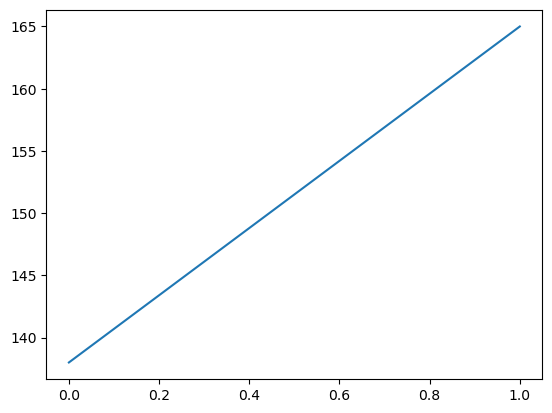

In [7]:
plt.plot(df['target'].value_counts())

<Axes: >

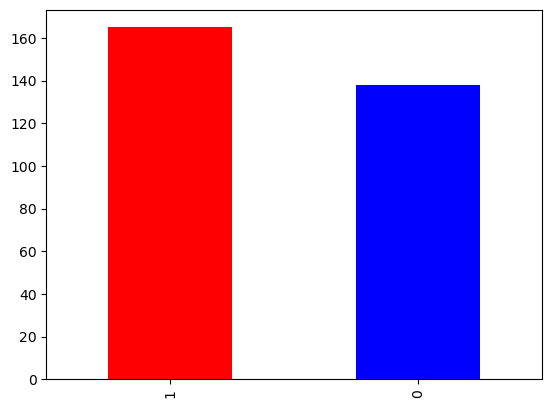

In [8]:
df['target'].value_counts().plot(kind= 'bar', color = ['red','blue'])

In [9]:
df.isna().sum()  #Does this data have any missing values?

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
len(df)

303

In [13]:
207 / 303 # 68% are males and rest are females

0.6831683168316832

In [14]:
pd.crosstab(df.target,df.sex) # out of all females 72 have heart disease, and out of all males 93 have heart disease

sex,0,1
target,,
0,24,114
1,72,93


In [15]:
72 / 96, 93 / 207 # females have 75% ratio of heart disease and males have 44%

(0.75, 0.4492753623188406)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

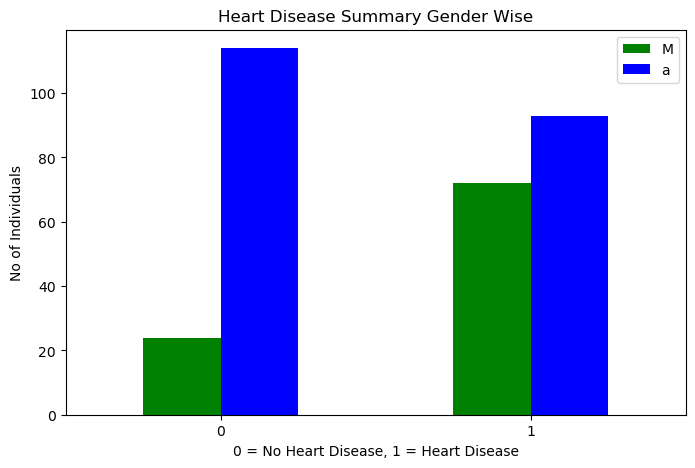

In [16]:
pd.crosstab(df.target,df.sex).plot(kind = "bar",
                                  figsize= (8,5),
                                  color = ["green", "blue"])
plt.title("Heart Disease Summary Gender Wise")
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease")
plt.ylabel("No of Individuals")
plt.legend("Male,Female")
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90]),
 [Text(0, 0, '71'),
  Text(1, 0, '88'),
  Text(2, 0, '90'),
  Text(3, 0, '95'),
  Text(4, 0, '96'),
  Text(5, 0, '97'),
  Text(6, 0, '99'),
  Text(7, 0, '103'),
  Text(8, 0, '105'),
  Text(9, 0, '106'),
  Text(10, 0, '108'),
  Text(11, 0, '109'),
  Text(12, 0, '111'),
  Text(13, 0, '112'),
  Text(14, 0, '113'),
  Text(15, 0, '114'),
  Text(16, 0, '115'),
  Text(17, 0, '116'),
  Text(18, 0, '117'),
  Text(19, 0, '118'),
  Text(20, 0, '120'),
  Text(21, 0, '121'),
  Text(22, 0, '122'),
  Text(23, 0, '123'),
  Text(24, 0, '124'),
  Text(25, 0, '125'),
  Text(26, 0, '126'),
  Text(27

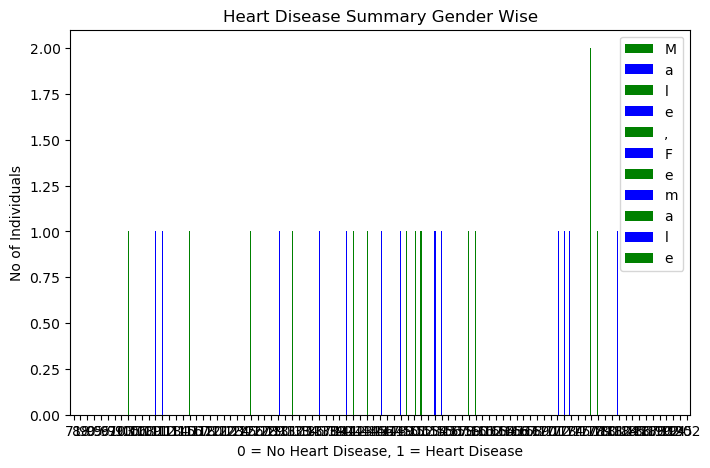

In [17]:
# Now comparing the Heart Disease Rate with respect to Age

pd.crosstab(df.thalach,df.age).plot(kind = "bar",
                                  figsize= (8,5),
                                  color = ["green", "blue"])
plt.title("Heart Disease Summary Gender Wise")
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease")
plt.ylabel("No of Individuals")
plt.legend("Male,Female")
plt.xticks(rotation=0)

In [18]:
df.thalach.value_counts() # There is a Difference of Length between last plot(Male/Female ) and Current pLot so we ahve tto choose the Right Plot

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

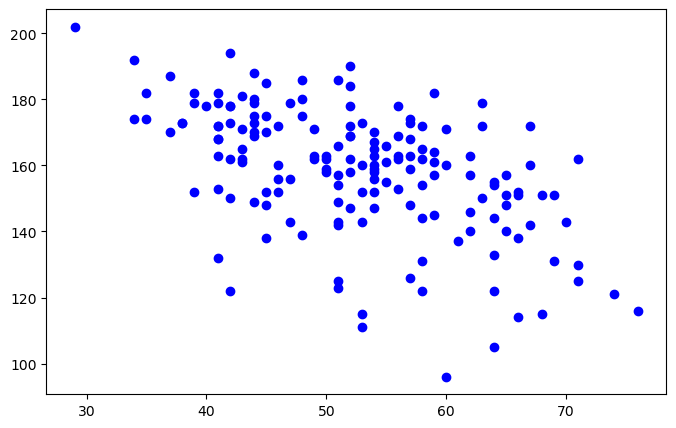

In [19]:
# Finding Patterns in Data using the Scatter Plot
plt.figure(figsize = (8,5))

# Creating Scatter Plot
plt.scatter(df.age[df.target == 1],df.thalach[df.target ==1],
           c= ["blue"])

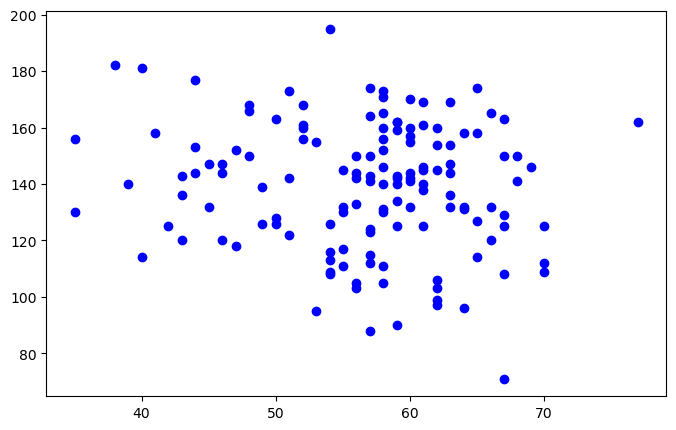

In [20]:
# Finding Patterns in Data using the Scatter Plot
plt.figure(figsize = (8,5))

# Creating Scatter Plot
plt.scatter(df.age[df.target == 0],df.thalach[df.target ==0],
           c= ["blue"])
# We find those who have heart problem their heart rate reduce as increase in age

C:\Users\bilal\AppData\Local\Temp\ipykernel_9564\3876001968.py:9: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("Heart Problem", "No heart Problem");


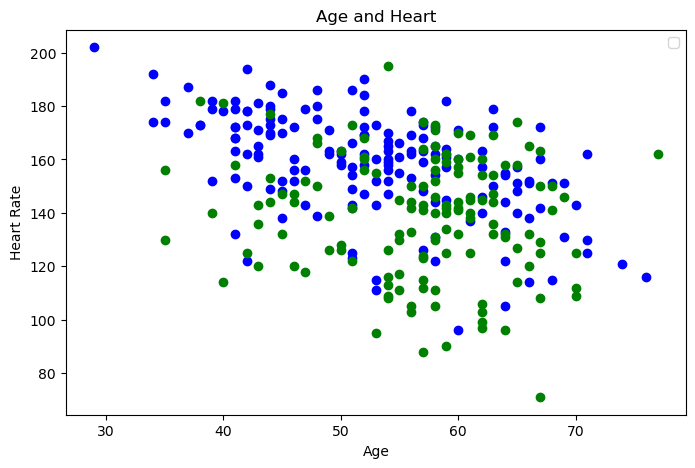

In [21]:
plt.figure(figsize = (8,5));
plt.scatter(df.age[df.target == 1],df.thalach[df.target ==1],
           c= ["blue"]);
plt.scatter(df.age[df.target == 0],df.thalach[df.target ==0],
           c= ["green"]);
plt.title('Age and Heart');
plt.xlabel('Age');
plt.ylabel('Heart Rate');
plt.legend("Heart Problem", "No heart Problem");

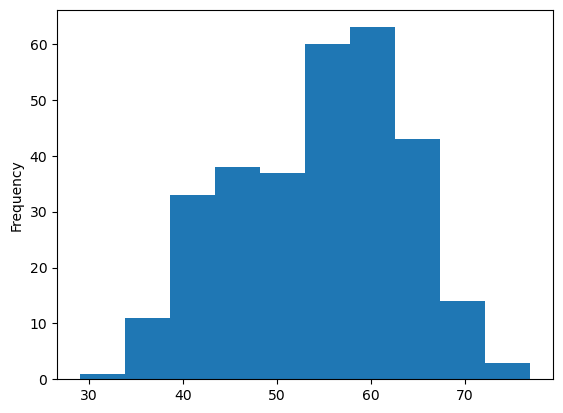

In [22]:
# Age Distribution with the help of HISTOGRAM plot
df.age.plot.hist();

# our right curve is skewed as we can see, so the conclusion is people are 50 age have Higher ratio oof Heart disease

# Histogram also tells us baout Outliers but in this Data we don't have any

In [23]:
# Checking Chest Pain Type with Heart Disease

df.cp.value_counts()
# it has four values so we can use bar plot
 

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

# But wait what does this 0,1,2,3 means in chestPain? This info should be taken from the customer

 cp: chest pain type   
        -- Value 0: typical angina: Chest Pain due to Decrease blood Pressure   
        -- Value 1: atypical angina: Chest Pain not related to heart rate    
        -- Value 2: non-anginal pain: Not Heart Related Chest Pain     
        -- Value 3: asymptomatic: Chest Pain not showing Heart problem   

In [24]:
# For better visualizing

pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


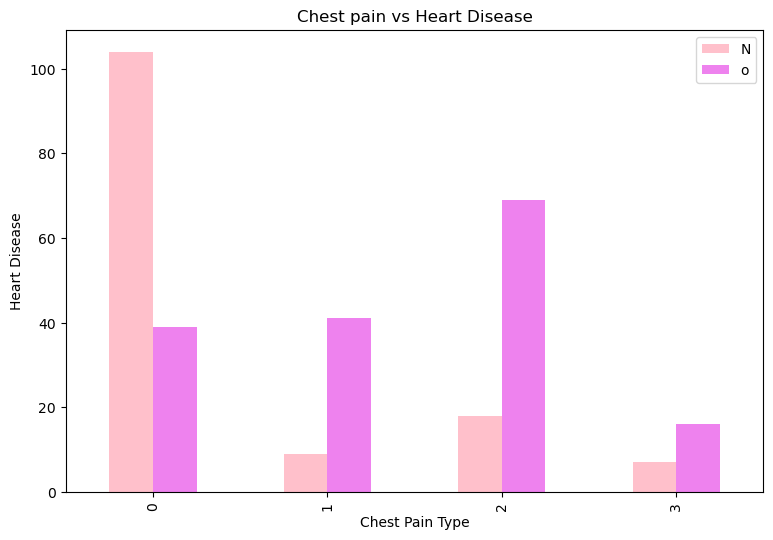

In [25]:
pd.crosstab(df.cp,df.target).plot(kind = 'bar',
                                 figsize = (9,6),
                                 color = ['pink','violet'])

# Now making Some description of the CHART
plt.title("Chest pain vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Heart Disease")
plt.legend("No Heart Disease, Heart Disease");

# Conclusion: Chest Pain type 1 and 2 have more heart rate Problem

# Correlation Matrix

In [26]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
df.corr()

# We can see three features   
# 1- Diagonal value which is always one, Showing the Correlation
# There are two coorelation: Positive Correlation: Like a friend happy = happy , sad = sad... Negative Correlation:Like an enemy



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# Lets Draw Correlation Map

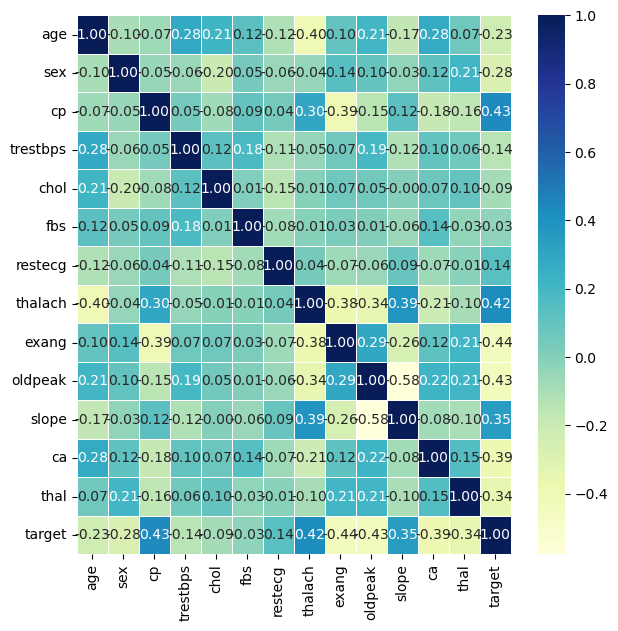

In [28]:
corr_map = df.corr()
home, room = plt.subplots(figsize = (7,7))
room = sns.heatmap(corr_map,
                  annot = True,
                  linewidth = 0.5,
                  fmt = "0.2f",
                  cmap = "YlGnBu")

# 3- Modelling

In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [30]:
 df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [31]:
# Splitting the data into X and y
X = df.drop('target',  axis = 1)
y = df['target']

# Using Random Seed so that others could produce the same result
np.random.seed(7)

#  Splitting the data Test and train
X_train, X_test, y_train , y_test = train_test_split(X,y ,test_size = 0.2)

In [32]:
len(X), len(X_train)

(303, 242)

In [33]:
242/303

0.7986798679867987

# Best model for this type of data is Classification

# The Models We are going to use  
1- k-Nearest-Neighbours Classfier    
2- Random Forest Classifier   
3- Logistic Regression   

In [34]:
# Making the dictionary of Models
models = { "Logistic Regression": LogisticRegression(),
    "KNeighbor": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier(),
       }

# Creating the Function to evalaute the models

def fit_and_score(models,X_train,X_test,y_train,y_test):
    np.random.seed(7)
    #Making a Dictionary which will score the model
    model_score = {}
    #Looping Through it
    for name,model in models.items():
        model.fit(X_train,y_train)
        #Will Evaluate the model and append its score
        model_score[name] = model.score(X_test, y_test)
        return model_score




In [35]:
model_scores = fit_and_score(models = models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test
                             )
model_scores

C:\Users\bilal\ml_project\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.7377049180327869}

<Axes: >

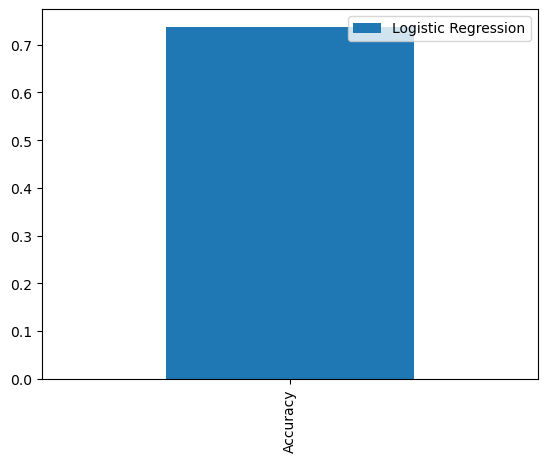

In [36]:
model_compare = pd.DataFrame(model_scores,index = ["Accuracy"])
model_compare.plot.bar()

In [37]:
np.random.seed(7)
KNN = KNeighborsClassifier().fit(X_train,y_train)
KNN.score(X_test,y_test)
     ,   

IndentationError: unexpected indent (2657146562.py, line 4)

In [ ]:
np.random.seed(7)
CLF = RandomForestClassifier().fit(X_train,y_train)
CLF.score(X_test,y_test)

In [ ]:
np.random.seed(7)
LR = LogisticRegression().fit(X_train,y_train)
LR.score(X_test,y_test)

In [ ]:
np.random.seed(7)
Model_scores = {"KNN" : KNN.score(X_test,y_test) , "CLF": CLF.score(X_test,y_test) ,"LR" :LR.score(X_test,y_test)}
Model_scores

In [ ]:
model_compare = pd.DataFrame(Model_scores,index = ["Accuracy"])
model_compare.plot.bar()

In [ ]:
model_compare.plot.barh()

<Axes: ylabel='Frequency'>

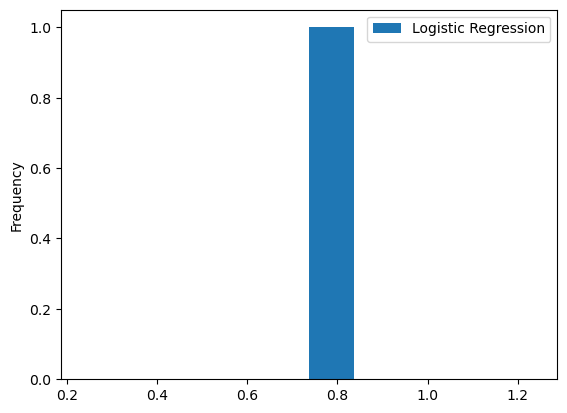

In [38]:
model_compare.plot.hist()

# Improving and Tuning the Model
Universal Methods used for all classification problems:    
    1-- Hyperparameter Tuning    
    2-- Features Improving   

Advanced Level:    
    1- Confusion Matrix  
    2- Cross_Validation   
    3- Recall   
    4- f1    
    5- Classification Report     
    6- ROC Vurve

In [39]:
KNNParam = KNeighborsClassifier()
KNNParam.set_params

<bound method BaseEstimator.set_params of KNeighborsClassifier()>

In [40]:
train_score = []
test_score = []

# Create range to be test for KNN
nneighbors = range(1,30)

# KNN Instance
KN = KNeighborsClassifier()

# Looping through the range
for i in nneighbors:
    KN.set_params(n_neighbors=i)
    
    #Run the fit ith value
    KN.fit(X_train,y_train)
    
    #Update the Training scpre
    train_score.append(KN.score(X_train, y_train))
    
    #Update the test score list
    test_score.append(KN.score(X_test,y_test))


In [41]:
train_score

[1.0,
 0.8099173553719008,
 0.7768595041322314,
 0.756198347107438,
 0.7603305785123967,
 0.731404958677686,
 0.743801652892562,
 0.7148760330578512,
 0.71900826446281,
 0.731404958677686,
 0.7272727272727273,
 0.7231404958677686,
 0.731404958677686,
 0.71900826446281,
 0.7148760330578512,
 0.6900826446280992,
 0.7272727272727273,
 0.71900826446281,
 0.7107438016528925,
 0.7066115702479339,
 0.7024793388429752,
 0.7024793388429752,
 0.7107438016528925,
 0.6900826446280992,
 0.7107438016528925,
 0.7066115702479339,
 0.7107438016528925,
 0.7066115702479339,
 0.7066115702479339]

In [42]:
test_score 

[0.6065573770491803,
 0.6557377049180327,
 0.6229508196721312,
 0.6229508196721312,
 0.5573770491803278,
 0.639344262295082,
 0.6721311475409836,
 0.6557377049180327,
 0.6065573770491803,
 0.6065573770491803,
 0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6557377049180327,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.6721311475409836,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7049180327868853,
 0.6557377049180327]

# Plot the Accuracy Score

<Axes: xlabel='row_0'>

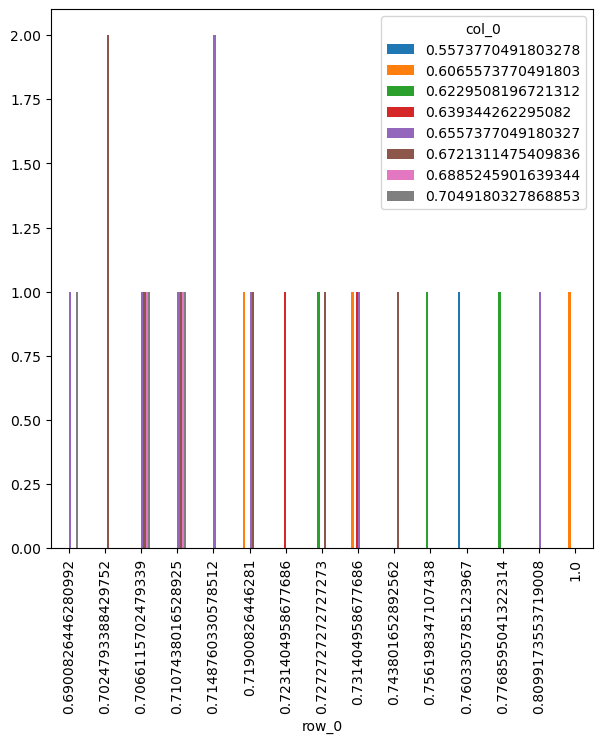

In [43]:
pd.crosstab(train_score,test_score).plot(kind = 'bar',figsize = (7,7))

Max KNN Score: 70.49%


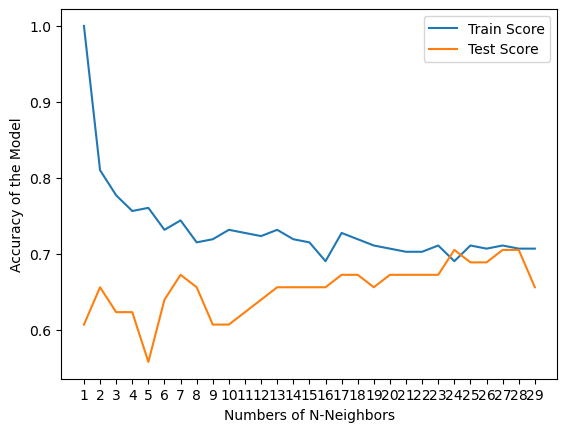

In [44]:
plt.plot(nneighbors,train_score, label = "Train Score")
plt.plot(nneighbors,test_score, label = "Test Score")
plt.xticks(np.arange(1,30,1));
plt.xlabel('Numbers of N-Neighbors')
plt.ylabel('Accuracy of the Model')
plt.legend()
print(f"Max KNN Score: {max(test_score)*100:0.2f}%")

In [45]:
# KNN is not giving the required accuracy(95%) even after tuning so trying other two models 

# HyperParameter Tunning Using Randomized Search CV   

LogisticRegression()  
RandomForestClassifier()

In [47]:
# Logistic Regression
LR_hp = {
    "C": np.logspace(-4,4,20),
    "solver": ['liblinear']
         }
RFC_hp = { 
    "n_estimators": np.arange(10,1600,100),
    "max_depth": [None,3,5,6,10],
    "min_samples_split": np.arange(2,20,2),
    "min_samples_leaf": np.arange(1,20,2)}

In [48]:
# Tuning the Logistic regression
np.random.seed(7)

# Lets Use RSCV to Tune HP
lr = RandomizedSearchCV(LogisticRegression(),
                       param_distributions = LR_hp,
                       cv = 5,
                       verbose = True,
                       n_iter = 20)

# Fit the Random HP Search model for Hr
lr.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [49]:
lr.score(X_test,y_test)

0.7540983606557377

In [50]:
lr.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [51]:
# Tuning the Random Forest Classifier
np.random.seed(7)
# Lets Use RSCV to Tune HP
clf = RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions = RFC_hp,
                       cv = 5,
                       verbose = True,
                       n_iter = 20)

# Fit the Random HP Search model for Hr
clf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 6, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([  10,  110,  210,  310,  410,  510,  610,  710,  810,  910, 1010,
       1110, 1210, 1310, 1410, 1510])},
                   verbose=True)

In [52]:
clf.score(X_test,y_test)

0.7049180327868853

In [53]:
clf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 19,
 'max_depth': 6}

In [ ]:
# KNN value increased a bit, CLF value decreased , but LR value remained the same
# {'KNN': 0.5573770491803278, after 70.49%
#  'CLF': 0.7213114754098361, after 0.7049180327868853
#  'LR': 0.7377049180327869 , after 0.7540983606557377 }

# Tuning
1- By hand/ Mnanually = Done   
2- Randomized Search CV = Done    
3- GridSearch CV = Now trying this one

# HyperParameter Tuning Uisng GridSearch CV

In [55]:
# Tuning the Logistic regression Using GSCV
np.random.seed(7)

# Lets Use RSCV to Tune HP
lr_grid = GridSearchCV(LogisticRegression(),
                       param_grid = LR_hp,
                       cv = 5,
                       verbose = True,
                      )

# Fit the Random HP Search model for Hr
lr_grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [57]:
lr_grid.score(X_test,y_test)

0.7540983606557377

In [59]:
lr_grid.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [ ]:
RFC_hp = { 
    "n_estimators": np.arange(1,101,50),
    "max_depth": [None,3,50],
    "min_samples_split": np.arange(2,8,2),
    "min_samples_leaf": np.arange(1,6,2)}

In [ ]:
# Tuning the Random Forest Classifier
np.random.seed(7)
# Lets Use RSCV to Tune HP
clf_grid = GridSearchCV(RandomForestClassifier(),
                       param_grid = RFC_hp,
                       cv = 5,
                       verbose = True,
                       )

# Fit the Random HP Search model for Hr
clf_grid.fit(X_train,y_train)

In [ ]:
clf_grid.score(X_test,y_test)

In [ ]:
clf_grid.best_params_

In [ ]:
# Hum still GOAL(95%) se bht nchy hain even GSCV k bd bh

# Improving and Tuning the Model
Universal Methods used for all classification problems:
1-- Hyperparameter Tuning
2-- Features Improving

Advanced Level:
1- Confusion Matrix
2- Cross_Validation
3- Recall
4- f1
5- Classification Report
6- ROC Vurve

In [78]:
# Plotting the Area Under The Curve(ROC)
from sklearn.metrics import roc_curve
y_predicted = lr_grid.predict(X_test)
plot_roc_curve(y_predicted,X_test,y_test)

NameError: name 'plot_roc_curve' is not defined

# Confusion Matrix

In [86]:
print(confusion_matrix(y_test,y_predicted))

[[18 12]
 [ 3 28]]


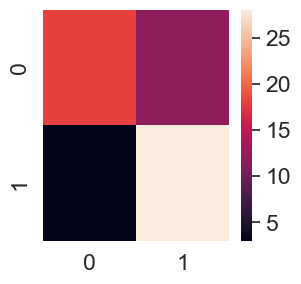

In [90]:
sns.set(font_scale = 1.5)

def plot_ConfMat(y_test,y_predicted):
    "This will Plot the Confusion Matrix"
    
    fig,ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_predicted)),
    annot = True,
    cbar = False
    
plot_ConfMat(y_test,y_predicted)

# Lets Plot the Classification Report

# 1 Class Imbalance .... AAty mn namak dhundna hai, RElevant data nikaalna hai.



# 2 Recall..... AATy mn dala namak to bt suno mjy namak ko alag kr k dedo

                                       Terrorist correctly identified
   -----------------------------------------------------------------------------        or  (TP/TP+FN)
    terrorist correcttly identified + terrorist incorrectly labelled as not terrorist

# 3 Precision.... APP pr jakr jo search krogy for eg: RADIO dhundna hai to vo RADIO hhi dikhaeg

                      Terrorist correctly identified
   -----------------------------------------------------------------------------        or  (TP/TP+FP)
    terrorist correcttly identified + innocents labelled as terrorists


# 4 F1 .... combination of Precision and  Recall

In [94]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.86      0.60      0.71        30
           1       0.70      0.90      0.79        31

    accuracy                           0.75        61
   macro avg       0.78      0.75      0.75        61
weighted avg       0.78      0.75      0.75        61



In [111]:
# Lets Increase Rhoubustness
lr_grid.best_params_
lr = LogisticRegression(C = 0.615848211066026, 
                        solver = 'liblinear')

In [118]:
# Cross Validated Accuracy
CV_Accuracy = cross_val_score(lr,
                             X,
                             y,
                             cv=7,
                             scoring = "accuracy")
CV_Accuracy.mean()

0.8284506191482934

In [120]:
# Cross Validated Precision
CV_Precision = cross_val_score(lr,
                             X,
                             y,
                             cv=7,
                             scoring = "precision")
CV_Precision.mean()

0.8108267922553637

In [121]:
# Cross Validated recall
CV_recall = cross_val_score(lr,
                             X,
                             y,
                             cv=7,
                             scoring = "recall")
CV_recall.mean()

0.89648033126294

In [123]:
# Cross Validated f1
CV_f1 = cross_val_score(lr,
                             X,
                             y,
                             cv=7,
                             scoring = "f1")
CV_f1.mean()

0.8508447334977947

# Visualizing The Cross Validated Matrices

<Axes: title={'center': 'Comparison of the Matrices'}>

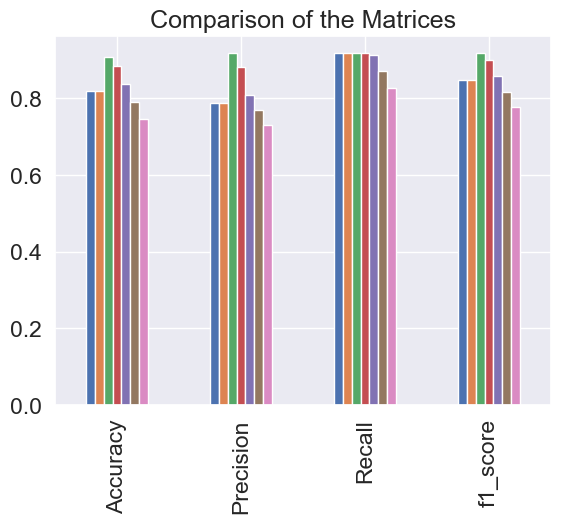

In [143]:
CV_PLOT = pd.DataFrame({
    "Accuracy" : CV_Accuracy,
    "Precision": CV_Precision,
    "Recall": CV_recall,
    "f1_score" : CV_f1,
    
})
CV_PLOT.T.plot.bar(title = "Comparison of the Matrices",
                 legend = False)

# Features Improvement

In [144]:
# features means har column ka different effect hota hai jesy har ndy ka apna body figure hota hai na
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [149]:
# Check Co-efficient
lr.fit(X_train,y_train)

LogisticRegression(C=0.615848211066026, solver='liblinear')

In [150]:
# its younger sisterr of correlation matrix which tells which attribute is more efficient
lr.coef_

array([[ 0.02252203, -1.36931508,  0.79024727, -0.02405079, -0.00188934,
         0.45440863,  0.40806228,  0.035555  , -0.78437428, -0.56658938,
         0.52894171, -0.64641313, -1.10031521]])

In [153]:
final_coef = dict(zip(df.columns, list(lr.coef_[0])))
final_coef
# its giving coef of every attribute
# positive = friend, negative = enemy

{'age': 0.022522029790988902,
 'sex': -1.369315078530457,
 'cp': 0.7902472653002438,
 'trestbps': -0.024050794197427644,
 'chol': -0.001889344518362533,
 'fbs': 0.454408627822306,
 'restecg': 0.40806227989876553,
 'thalach': 0.03555499572128291,
 'exang': -0.7843742791918811,
 'oldpeak': -0.5665893803503371,
 'slope': 0.5289417069090245,
 'ca': -0.6464131290428378,
 'thal': -1.1003152092892416}

<Axes: title={'center': 'Features Importance'}>

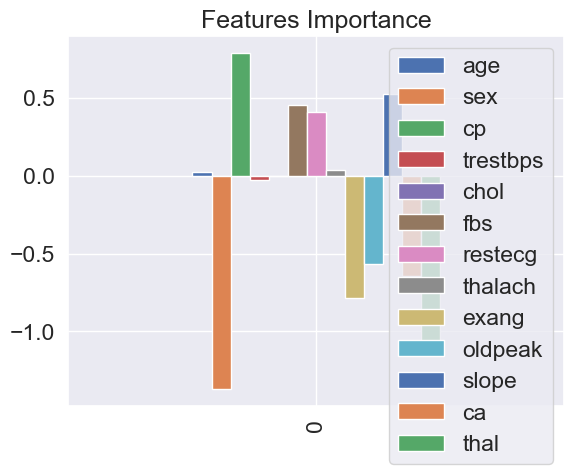

In [156]:
features = pd.DataFrame(final_coef,index = [0])
features.plot.bar(title = "Features Importance", legend = "Data")

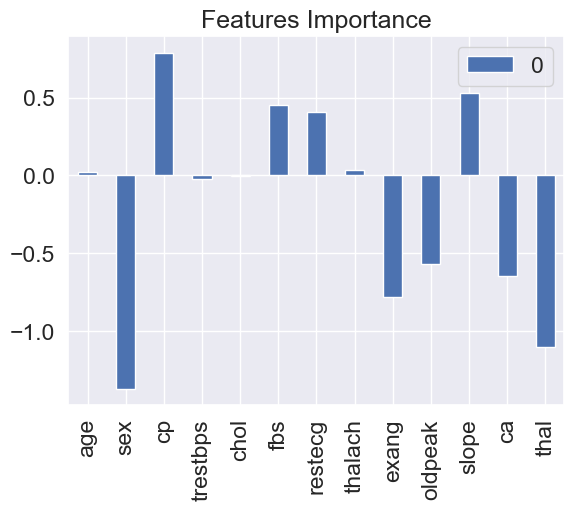

In [160]:
features.T.plot.bar(title = "Features Importance", legend = "Data");

In [161]:
# It gave us idea, when u foucs on sex,cp,Thal,ca,old peak,exang ... it will give u=you good result

# Conclusion

1- We set 95% accuracy goal , but we didn't met it , so we can:   
*- We can ask some Question   
  .-  What if we try to get more data     
  .-  What uf we try to improve the quality of the data     
  .-  What if we try to use other Models and see if there is anyy improvement   
    
Note-- Make sure our Actual goal was not leading its towards 95%
